In [1]:
!pip install kmodes

    100% |################################| 16.8MB 86kB/s  eta 0:00:01   18% |#####                           | 3.1MB 42.7MB/s eta 0:00:01
  Found existing installation: numpy 1.11.3
    Uninstalling numpy-1.11.3:
      Successfully uninstalled numpy-1.11.3


## Kmodes

In [2]:
import pandas as pd
import numpy as np
from kmodes import kmodes,kprototypes
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
soy  = pd.read_csv('soybean.csv')

In [5]:
soy.head()

,4,0,2,1,1.1,1.2,0.1,1.3,0.2,2.1,...,0.10,0.11,4.1,0.12,0.13,0.14,0.15,0.16,0.17,D1
0,5,0,2,1,0,3,1,1,1,2,...,0,0,4,0,0,0,0,0,0,D1
1,3,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,D1
2,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,D1
3,4,0,2,1,0,3,0,2,0,2,...,0,0,4,0,0,0,0,0,0,D1
4,5,0,2,1,0,2,0,1,1,0,...,0,0,4,0,0,0,0,0,0,D1


In [7]:
%%time
#for itr in ['Huang', 'Cao', 'random']:
cost = []
for cluster in range(1,10):
    kmodes_huang = kmodes.KModes(n_clusters=cluster, init='Huang',max_iter =50) 
    kmodes_huang.fit(soy)
    cost.append(kmodes_huang.cost_)
    print ( "cluster {} complete".format(cluster))

cluster 1 complete
cluster 2 complete
cluster 3 complete
cluster 4 complete
cluster 5 complete
cluster 6 complete
cluster 7 complete
cluster 8 complete
cluster 9 complete
CPU times: user 212 ms, sys: 32 ms, total: 244 ms
Wall time: 238 ms


In [9]:
cost

[424.0, 352.0, 266.0, 196.0, 174.0, 166.0, 153.0, 153.0, 132.0]

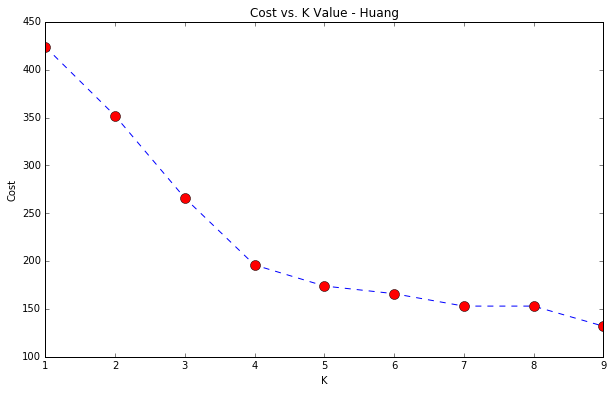

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),cost,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Cost vs. K Value - Huang')
plt.xlabel('K')
plt.ylabel('Cost')

In [11]:
kmodes_huang = kmodes.KModes(n_clusters=4, init='Huang',max_iter =50) 
kmodes_huang.fit(soy)

KModes(cat_dissim=<function matching_dissim at 0x7f4e41d65d90>, init='Huang',
    max_iter=50, n_clusters=4, n_init=1, verbose=0)

In [15]:
kmodes_huang.labels_.shape

(46,)

In [14]:
soy.shape

(46, 36)

In [16]:
soy['cluster_label'] = kmodes_huang.labels_

In [17]:
soy.groupby('cluster_label').mean()

,4,0,2,1,1.1,1.2,0.1,1.3,0.2,2.1,...,0.9,0.10,0.11,4.1,0.12,0.13,0.14,0.15,0.16,0.17
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,1.294118,1.0,1.764706,0.588235,0.352941,1.823529,1.117647,1.647059,0.529412,0.941176,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.300000,0.8,2.000000,0.000000,0.200000,1.500000,1.000000,1.500000,0.400000,1.500000,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.1
2,4.700000,0.0,0.000000,1.600000,0.600000,1.600000,2.500000,1.000000,0.500000,0.900000,...,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.555556,0.0,2.000000,1.000000,0.000000,2.000000,0.333333,1.333333,0.555556,1.222222,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


### Kprototype 

In [22]:
stock = pd.read_csv('stocks.csv',header =0)

In [23]:
stock.head()

,AAPL,738.5,tech,USA
0,XOM,369.5,nrg,USA
1,GOOGL,368.2,tech,USA
2,MSFT,346.7,tech,USA
3,BRK-A,343.5,fin,USA
4,WFC,282.4,fin,USA


In [26]:
%%time
#for itr in ['Huang', 'Cao', 'random']:
cost = []
for cluster in range(1,6):
    kprotp_huang = kprototypes.KPrototypes(n_clusters=cluster, init='Huang',max_iter =50) 
    kprotp_huang.fit(np.array(stock),categorical = [0,2,3])
    cost.append(kprotp_huang.cost_)
    print ( "cluster {} complete".format(cluster))

cluster 1 complete
cluster 2 complete
cluster 3 complete
cluster 4 complete
cluster 5 complete
CPU times: user 188 ms, sys: 4 ms, total: 192 ms
Wall time: 190 ms


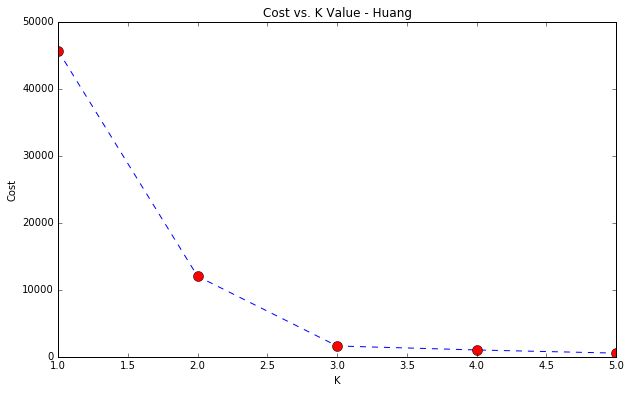

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),cost,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Cost vs. K Value - Huang')
plt.xlabel('K')
plt.ylabel('Cost')

In [31]:
kprotp_huang = kprototypes.KPrototypes(n_clusters=3, init='Huang',max_iter =50) 
kprotp_huang.fit(np.array(stock),categorical = [0,2,3])

KPrototypes(cat_dissim=<function matching_dissim at 0x7f4e41d65d90>,
      gamma=74.07266594281613, init='Huang', max_iter=50, n_clusters=3,
      n_init=10, num_dissim=<function euclidean_dissim at 0x7f4e41d65e18>,
      verbose=0)

In [32]:
stock['cluster_label'] = kprotp_huang.labels_

In [33]:
stock.groupby('cluster_label').mean()

,738.5
cluster_label,
0,275.350000
1,356.975000
2,197.666667


In [35]:
stock.groupby('cluster_label').describe(include='all')

738.5   AAPL  USA  tech
cluster_label                                     
0             count     4.000000      4    4     4
              unique         NaN      4    2     3
              top            NaN    CHL  USA  cons
              freq           NaN      1    3     2
              mean    275.350000    NaN  NaN   NaN
              std      12.160181    NaN  NaN   NaN
              min     257.200000    NaN  NaN   NaN
              25%     274.075000    NaN  NaN   NaN
              50%     280.900000    NaN  NaN   NaN
              75%     282.175000    NaN  NaN   NaN
              max     282.400000    NaN  NaN   NaN
1             count     4.000000      4    4     4
              unique         NaN      4    1     3
              top            NaN    XOM  USA  tech
              freq           NaN      1    4     2
              mean    356.975000    NaN  NaN   NaN
              std      13.784381    NaN  NaN   NaN
              min     343.500000    NaN  NaN   NaN
              25%     345.900000    NaN  NaN   NaN
              50%     357.450000    NaN  NaN   NaN
              75%     368.525000    NaN  NaN   NaN
              max     369.500000    NaN  NaN   NaN
2             count     3.000000      3    3     3
              unique         NaN      3    2     3
              top            NaN  RDS-A  USA   nrg
              freq           NaN      1    2     1
              mean    197.666667    NaN  NaN   NaN
              std       6.767816    NaN  NaN   NaN
              min     192.100000    NaN  NaN   NaN
              25%     193.900000    NaN  NaN   NaN
              50%     195.700000    NaN  NaN   NaN
              75%     200.450000    NaN  NaN   NaN
              max     205.200000    NaN  NaN   NaN

In [36]:
stock

,AAPL,738.5,tech,USA,cluster_label
0,XOM,369.5,nrg,USA,1
1,GOOGL,368.2,tech,USA,1
2,MSFT,346.7,tech,USA,1
3,BRK-A,343.5,fin,USA,1
4,WFC,282.4,fin,USA,0
5,CHL,282.1,tel,CN,0
6,JNJ,279.7,cons,USA,0
7,WMT,257.2,cons,USA,0
8,VZ,205.2,tel,USA,2
9,ORCL,192.1,tech,USA,2
